In [156]:
import pandas as pd
import jsonlines

In [157]:
annotated_data = list(jsonlines.open('../tasks/data_split_annotated_sources.jsonl'))
annotated_data = list(map(lambda x: x['data'], annotated_data))

In [158]:
annot_data_dfs = list(map(pd.DataFrame, annotated_data))

In [159]:
unique_quote_types_percs = list(map(lambda x: (x[0], x[1]['quote_type'].unique().shape[0] / x[1].shape[0],  ), enumerate(annot_data_dfs)))

In [160]:
sorted(unique_quote_types_percs, key=lambda x: -x[1])

[(492, 0.8),
 (87, 0.6666666666666666),
 (421, 0.6666666666666666),
 (577, 0.5555555555555556),
 (325, 0.5),
 (364, 0.5),
 (465, 0.5),
 (374, 0.47058823529411764),
 (70, 0.46153846153846156),
 (513, 0.46153846153846156),
 (540, 0.4375),
 (572, 0.42857142857142855),
 (391, 0.4166666666666667),
 (498, 0.4166666666666667),
 (548, 0.4166666666666667),
 (385, 0.4),
 (418, 0.4),
 (320, 0.375),
 (516, 0.375),
 (563, 0.36363636363636365),
 (596, 0.35714285714285715),
 (281, 0.35294117647058826),
 (459, 0.35294117647058826),
 (269, 0.35),
 (490, 0.3448275862068966),
 (54, 0.3333333333333333),
 (75, 0.3333333333333333),
 (142, 0.3333333333333333),
 (355, 0.3333333333333333),
 (409, 0.3333333333333333),
 (423, 0.3333333333333333),
 (496, 0.3333333333333333),
 (510, 0.3333333333333333),
 (553, 0.3333333333333333),
 (558, 0.32142857142857145),
 (549, 0.32),
 (241, 0.3157894736842105),
 (520, 0.3157894736842105),
 (413, 0.3125),
 (545, 0.3076923076923077),
 (559, 0.3076923076923077),
 (322, 0.3),
 (

In [161]:
import pyperclip
pd.options.display.max_colwidth = 500
pyperclip.copy(annot_data_dfs[492][['sent', 'head', 'quote_type']].to_latex(index=False))

/var/folders/89/6dsq1ymj63x009t6wpt25f9h0000gp/T/ipykernel_977/537967330.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(annot_data_dfs[492][['sent', 'head', 'quote_type']].to_latex(index=False))


In [162]:
t = list(filter(lambda x: (x['head'] == 'passive-voice').sum() > 1, annot_data_dfs))

In [163]:
import re 
from unidecode import unidecode

def fix_quote_type(sent):    
    CLEANR = re.compile('<.*?>')
    def cleanhtml(raw_html):
        cleantext = re.sub(CLEANR, '', raw_html)
        return cleantext
    
    def normalize(text):
        text = '' if pd.isnull(text) else text
        text = re.sub('\s+', ' ', text)
        return cleanhtml(unidecode(text).strip())
    
    quote_type_mapper = {
        '': 'No Quote',
        'BACKGROUND': 'Background/Narrative',
        'NARRATIVE': 'Background/Narrative',
        'PUBLIC SPEECH, NOT TO JOURNO': 'Statement/Public Speech',
        'STATEMENT': 'Statement/Public Speech',
        'COMMUNICATION, NOT TO JOURNO': 'Email/Social Media Post',
        'LAWSUIT': 'Court Proceeding',
        'TWEET': 'Email/Social Media Post',
        'SOCIAL MEDIA POST': 'Email/Social Media Post',        
        'PROPOSAL': 'Proposal/Order/Law',
        'Other: LAWSUIT': 'Court Proceeding',
        'Other: Evaluation': 'Quote',
        'Other: DIRECT OBSERVATION': 'Direct Observation',
        'Other: Campaign filing': 'Published Work/Press Report',
        'Other: VOTE/POLL': 'Vote/Poll',
        'Other: PROPOSAL': 'Proposal/Order/Law',
        'Other: Campaign Filing': 'Published Work/Press Report',
        'Other: Data analysis': 'Direct Observation',
        'Other: Analysis': 'Direct Observation',
        'Other: LAW': 'Proposal/Order/Law',
        'Other: Investigation': 'Direct Observation',
        'Other: Database': 'Published Work/Press Report',
        'Other: Data Analysis': 'Direct Observation',
        'DOCUMENT': 'Published Work/Press Report',
        'PRESS REPORT': 'Published Work/Press Report',
        'PUBLISHED WORK': 'Published Work/Press Report',        
    }
    other_cats = {
        'Other: Cannot Determine': 'Other',
        'Quote': 'Other', 
        'VOTE/POLL': 'Other',
        'Vote/Poll':'Other',
        'Declined Comment': 'Other',
        'PRICE SIGNAL': 'Other',
        'DECLINED COMMENT': 'Other'
    }

    q = sent.get('quote_type', '')
    q = quote_type_mapper.get(q, q)
    q = other_cats.get(q, q )
    if (q == 'QUOTE'):
        if ('"' in normalize(sent['sent'])):
            return 'Indirect Quote'
        else:
            return 'Direct Quote'
    return q.title() if pd.notnull(q) else q

In [164]:
all_annot_dfs = pd.concat(annot_data_dfs)

In [165]:
quote_counts = all_annot_dfs.apply(fix_quote_type, axis=1).value_counts().pipe(lambda s: s * 2)

In [166]:
quote_counts

No Quote                       23614
Direct Quote                    7928
Indirect Quote                  6564
Background/Narrative            3818
Statement/Public Speech         3280
Published Work/Press Report     2730
Email/Social Media Post         1352
Proposal/Order/Law               896
Other                            610
Court Proceeding                 540
Direct Observation               302
dtype: int64

In [167]:
pyperclip.copy(quote_counts.to_latex())

/var/folders/89/6dsq1ymj63x009t6wpt25f9h0000gp/T/ipykernel_977/2933106822.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(quote_counts.to_latex())


# Look at Detection/Attribution Scoring Output

In [21]:
import glob
import jsonlines
import pandas as pd 
import seaborn as sns
import json
import numpy as np 
from scipy.stats import entropy

input_files = glob.glob('../tasks/quote_detection_and_attribution/test_*')
run_failed = lambda x: x.loc[lambda df: df['is_quote'] == True]['attribution'].isnull().all()

all_processed_articles = []
for f in input_files:
    a = list(jsonlines.open(f))
    all_processed_articles.extend(a)

silver_standard_dfs = list(map(pd.DataFrame, all_processed_articles))
silver_standard_dfs = list(filter(lambda x: not run_failed(x), silver_standard_dfs))

all_silver_standard = pd.concat(silver_standard_dfs)

In [22]:
pronouns = json.load(open('pronouns.txt'))
all_silver_standard['attribution'].apply(lambda x: x in pronouns).value_counts()

False    264735
True        172
Name: attribution, dtype: int64

In [31]:
all_gold_standard.loc[lambda df: df['sent'].str.len() > 2]['doc_id'].value_counts().median()

30.0

In [32]:
test_gold_standard.loc[lambda df: df['sent'].str.len() > 2]['doc_id'].value_counts().median()

67.5

In [33]:
all_silver_standard.loc[lambda df: df['sent'].str.len() > 2]['doc_idx'].value_counts().median()

27.0

In [34]:
gold_standard = list(jsonlines.open('../tasks/data_split_annotated_sources.jsonl'))

to_exclude = [
    '',
    'NO QUOTE', 
    'NARRATIVE',
    'BACKGROUND',
    'DIRECT OBSERVATION'
]

train_gold_standard =  list(filter(lambda x: x['split'] == 'train', gold_standard))
all_gold_standard = pd.concat(list(map(lambda x: pd.DataFrame(x['data']), train_gold_standard)))
gold_standard_test = list(filter(lambda x: x['split'] == 'test', gold_standard))
test_gold_standard = pd.concat(list(map(lambda x: pd.DataFrame(x['data']), gold_standard_test)))

all_gold_standard = all_gold_standard.assign(is_quote=lambda df: ~df['quote_type'].isin(to_exclude))
test_gold_standard = test_gold_standard.assign(is_quote=lambda df: ~df['quote_type'].isin(to_exclude))

In [35]:
test_gold_doc_len = test_gold_standard.groupby('doc_id')['sent'].apply(lambda s: s.str.len().sum())
all_gold_doc_len = all_gold_standard.groupby('doc_id')['sent'].apply(lambda s: s.str.len().sum())
all_silver_doc_len = all_silver_standard.groupby('doc_idx')['sent'].apply(lambda s: s.str.len().sum())

<AxesSubplot: xlabel='doc_len', ylabel='split'>

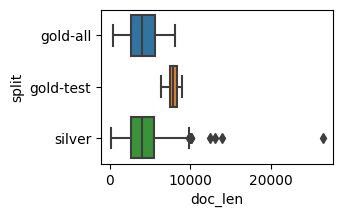

In [366]:
import matplotlib.pyplot as plt
f, ax = plt.subplots( 1, 1, figsize=(3,2))

pd.concat([
    all_gold_doc_len.to_frame('doc_len').assign(split='gold-all'),
    test_gold_doc_len.to_frame('doc_len').assign(split='gold-test'),
    all_silver_doc_len.to_frame('doc_len').assign(split='silver')
]).pipe(lambda df: 
       sns.boxplot(data=df, x='doc_len', y='split', ax=ax)
       )

In [43]:
pd.concat([
    all_gold_standard.groupby('doc_id')['is_quote'].mean().to_frame('mean').assign(split='Gold (Train)'),
    test_gold_standard.groupby('doc_id')['is_quote'].mean().to_frame('mean').assign(split='Gold (Test)'),
    all_silver_standard.groupby('doc_idx')['is_quote'].mean().to_frame('mean').assign(split='Silver')
]).groupby('split').mean()

,mean
split,
Gold (Test),0.469547
Gold (Train),0.477355
Silver,0.574906


In [66]:
(all_silver_standard
 .loc[lambda df: df['sent_idx'] == 0]
 .loc[lambda df: df['is_quote'] == True]
 .iloc[10]
 ['sent']
)

'BEIRUT, Lebanon — Syrian antigovernment fighters said on Monday that they had downed a government helicopter gunship during fierce fighting in the eastern suburbs of Damascus, while Syrian state television confirmed that a helicopter had crashed in the neighborhood of Qaboun, without giving more details about the cause.'

In [71]:
all_silver_standard.groupby('sent_idx')['is_quote'].mean().loc[:40].idxmax()

0

In [74]:
all_gold_standard.groupby('sent_idx')['is_quote'].mean().idxmax()

86

<AxesSubplot: xlabel='sent_perc'>

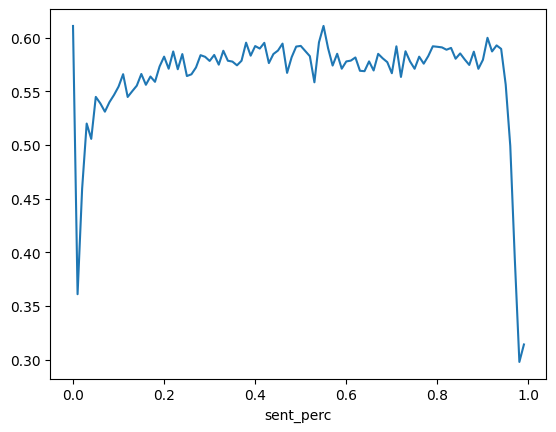

In [109]:
(all_silver_standard
 .merge(
    right=(all_silver_standard['doc_idx']
     .value_counts()
     .to_frame('n_sents')
     .reset_index()
     .rename(columns={'index': 'doc_idx'})
    ),
    right_on='doc_idx',
    left_on='doc_idx'
 )
 .assign(sent_perc=lambda df: df.pipe(lambda df: df['sent_idx']/ df['n_sents']).round(2))
 .groupby('sent_perc')['is_quote'].mean()
 .plot()
)

In [107]:
(all_gold_standard
 .merge(
    right=(all_gold_standard['doc_id']
     .value_counts()
     .to_frame('n_sents')
     .reset_index()
     .rename(columns={'index': 'doc_id'})
    ),
    right_on='doc_id',
    left_on='doc_id'
 )
 .assign(sent_perc=lambda df: df.pipe(lambda df: df['sent_idx']/ df['n_sents']).round(2))
 .groupby('sent_perc')['is_quote'].mean()
#  .plot()
 .idxmax()
)

0.92

In [104]:
(test_gold_standard
 .merge(
    right=(test_gold_standard['doc_id']
     .value_counts()
     .to_frame('n_sents')
     .reset_index()
     .rename(columns={'index': 'doc_id'})
    ),
    right_on='doc_id',
    left_on='doc_id'
 )
 .assign(sent_perc=lambda df: df.pipe(lambda df: df['sent_idx']/ df['n_sents']).round(2))
 .groupby('sent_perc')['is_quote'].mean()
 .idxmax()
)

0.96

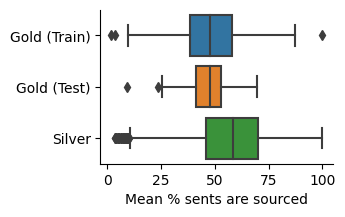

In [425]:
import matplotlib.pyplot as plt
f, ax = plt.subplots( 1, 1, figsize=(3,2))

ax = (
    pd.concat([
        all_gold_standard.groupby('doc_id')['is_quote'].mean().to_frame('mean').assign(split='Gold (Train)'),
        test_gold_standard.groupby('doc_id')['is_quote'].mean().to_frame('mean').assign(split='Gold (Test)'),
        all_silver_standard.groupby('doc_idx')['is_quote'].mean().to_frame('mean').assign(split='Silver')
    ])
    .assign(mean=lambda df: df['mean'] * 100)
    .pipe(lambda df: sns.boxplot(data=df, x='mean', y='split', ax=ax))
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('')
ax.set_xlabel('Mean % sents are sourced')
plt.savefig('../resources/latex/acl2023/figures/mean-per-sourced-sents.pdf', bbox_inches='tight')

In [484]:
doc_len_quotes = pd.concat([
    all_silver_standard.groupby('doc_idx', group_keys=True)['is_quote'].mean().to_frame('mean % quotes') * 100,
    all_silver_standard.assign(sent_len=lambda df: df['sent'].str.len()).groupby('doc_idx', group_keys=True)['sent_len'].sum().to_frame('doc len'),
    all_silver_standard.groupby('doc_idx')['attribution'].apply(lambda s: len(s.unique())).to_frame('num sources')
], axis=1)

In [488]:
bins = np.arange(0, 10_000, step=100)
bins = [0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 3000, 4000]

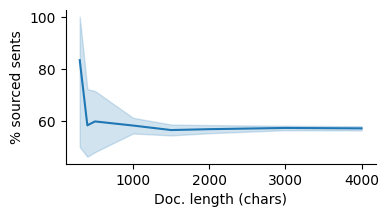

In [505]:
f, ax = plt.subplots(1, 1, figsize=(4,2))
(doc_len_quotes
 .assign(bin=lambda df: pd.cut(df['doc len'], bins).apply(lambda x: x.right))
 .pipe(lambda df: 
      sns.lineplot(data=df, x='bin', y='mean % quotes')
      )
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('% sourced sents')
ax.set_xlabel('Doc. length (chars)')
plt.savefig('../resources/latex/acl2023/figures/perc-sources-by-doc-len__large.pdf', bbox_inches='tight')

In [381]:
results_dict = {}
results_dict['mean % sentences per doc'] = {
    'gold-all': all_gold_standard.groupby('doc_id')['is_quote'].mean().median()* 100,
    'gold-test': test_gold_standard.groupby('doc_id')['is_quote'].mean().median() * 100,    
    'silver': all_silver_standard.groupby('doc_idx')['is_quote'].mean().median() * 100
}

In [369]:
gold_sentences_per_sources_per_document = (
    all_gold_standard
     .loc[lambda df: df['head'] != '']
     .loc[lambda df: ~df['head'].apply(lambda x: x in pronouns)]
     .groupby('doc_id')['head']
     .value_counts()
)

test_gold_sentences_per_sources_per_document = (
    test_gold_standard
     .loc[lambda df: df['head'] != '']
     .loc[lambda df: ~df['head'].apply(lambda x: x in pronouns)]
     .groupby('doc_id')['head']
     .value_counts()
)

silver_sentences_per_sources_per_document = (
    all_silver_standard
     .loc[lambda df: df['attribution'] != 'None']
     .loc[lambda df: ~df['attribution'].apply(lambda x: x in pronouns)]
     .groupby('doc_idx')['attribution']
     .value_counts()
)

In [370]:
gold_perc_sentences_per_source_per_document = (
    gold_sentences_per_sources_per_document
     .groupby(level=0)
     .aggregate(list)
     .apply(np.array)
     .apply(lambda x: x/x.sum())
    #  .apply(pd.Series)
    #  .unstack()
    #  .dropna()
    #  .hist(bins=50)
)

test_gold_perc_sentences_per_source_per_document = (
    test_gold_sentences_per_sources_per_document
     .groupby(level=0)
     .aggregate(list)
     .apply(np.array)
     .apply(lambda x: x/x.sum())
    #  .apply(pd.Series)
    #  .unstack()
    #  .dropna()
    #  .hist(bins=50)
)

silver_perc_sentences_per_source_per_document = (
    silver_sentences_per_sources_per_document
     .groupby(level=0)
     .aggregate(list)
     .apply(np.array)
     .apply(lambda x: x/x.sum())
    #  .apply(pd.Series)
    #  .unstack()
    #  .dropna()
    #  .hist(bins=50)
)

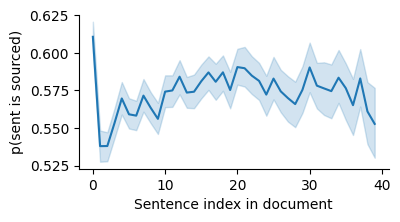

In [19]:
f, ax= plt.subplots(1, 1, figsize=(4, 2))
(all_silver_standard
 .loc[lambda df: df['sent_idx'] < 40]
 .pipe(lambda df: sns.lineplot(data=df, x='sent_idx', y='is_quote'))
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('p(sent is sourced)')
ax.set_xlabel('Sentence index in document')
plt.savefig('../resources/latex/acl2023/figures/source-likelihood-by-sentence.pdf', bbox_inches='tight')

In [382]:
results_dict['med. num. chars. per doc.'] = {
    'gold-all': int(all_gold_doc_len.median()),
    'gold-test': int(test_gold_doc_len.median()),
    'silver': int(all_silver_doc_len.median()),
}

results_dict['perc. sentences by top source'] = {
    'gold-all': gold_perc_sentences_per_source_per_document.apply(lambda x: x[0]).median() * 100,
    'gold-test': test_gold_perc_sentences_per_source_per_document.apply(lambda x: x[0]).median() * 100,    
    'silver': silver_perc_sentences_per_source_per_document.apply(lambda x: x[0]).median() * 100
}
results_dict['perc. sentences by bottom source'] = {
    'gold-all': gold_perc_sentences_per_source_per_document.apply(lambda x: x[-1]).median() * 100,
    'gold-test': test_gold_perc_sentences_per_source_per_document.apply(lambda x: x[-1]).median() * 100,    
    'silver': silver_perc_sentences_per_source_per_document.apply(lambda x: x[-1]).median()* 100
}
results_dict['num. sources by doc'] = {
    'gold-all': gold_perc_sentences_per_source_per_document.str.len().mean(),
    'gold-test': test_gold_perc_sentences_per_source_per_document.str.len().mean(),    
    'silver': silver_perc_sentences_per_source_per_document.str.len().mean()
}
results_dict['entropy over sources'] = {
    'gold-all': gold_perc_sentences_per_source_per_document.apply(entropy).median(),
    'gold-test': test_gold_perc_sentences_per_source_per_document.apply(entropy).median(),    
    'silver': silver_perc_sentences_per_source_per_document.apply(entropy).median()
}

In [384]:
results_df = pd.DataFrame(results_dict).round(1).T.rename(columns={'gold-all': 'gold-train'})

In [387]:
import pyperclip
pyperclip.copy(results_df.to_latex())

/var/folders/89/6dsq1ymj63x009t6wpt25f9h0000gp/T/ipykernel_977/2509495308.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(results_df.to_latex())


In [493]:
# compare silver standard to gold standard

# num sources per document
# % sentences attributable to sources per document
# entropy over sentences per source per document
# % of quotes by source # across documents

all_silver_standard['version'] = all_silver_standard['doc_idx'].str.split('-').str.get(1)

num_sources_by_version = (
    all_silver_standard
     .groupby('doc_idx')['attribution']
     .unique().apply(len)
     .reset_index()
     .rename(columns={'attribution': 'num_sources'})
     .assign(version=lambda df: df['doc_idx'].str.split('-').str.get(1).astype(int))
     .assign(entry_id=lambda df: df['doc_idx'].str.split('-').str.get(0).astype(int))                          
)

In [500]:
ls ../resources/latex/acl2023/figures/

mean-per-sourced-sents.pdf   perc-sources-by-doc-len.pdf


In [516]:
%matplotlib inline

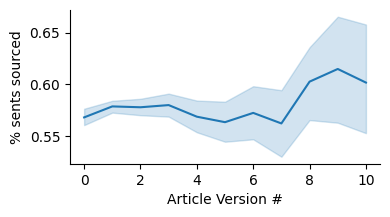

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(4, 2))

(all_silver_standard
 .groupby('doc_idx')
 ['is_quote'].mean()
 .reset_index()
 .rename(columns={'is_quote': 'mean_sents'})
 .assign(version=lambda df: df['doc_idx'].str.split('-').str.get(1).astype(int))
 .assign(entry_id=lambda df: df['doc_idx'].str.split('-').str.get(0).astype(int))
 .pipe(lambda df: 
        sns.lineplot(
            data=df.loc[lambda df: df['version'] < 11], 
            x='version',
            y='mean_sents',
            ax=ax
        )
    )
)

ax.set_ylabel('% sents sourced')
ax.set_xlabel('Article Version #')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.savefig('../resources/latex/acl2023/figures/num-sources-by-version__large.pdf', bbox_inches='tight')

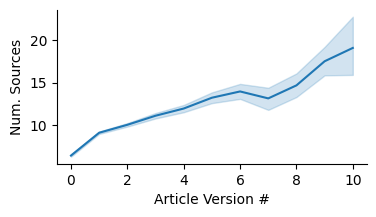

In [504]:
f, ax = plt.subplots(1, 1, figsize=(4, 2))

sns.lineplot(
    data=num_sources_by_version.loc[lambda df: df['version'] < 11], 
    x='version',
    y='num_sources',
    ax=ax
)
ax.set_ylabel('Num. Sources')
ax.set_xlabel('Article Version #')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('../resources/latex/acl2023/figures/num-sources-by-version__large.pdf', bbox_inches='tight')